In [1]:
import matplotlib.pyplot as plt
import pickle

with open('saved_statistics_dict.pkl','rb') as f:
    statistics_dict = pickle.load(f)

In [2]:
statistics_dict

{0: {'reward': [0, 526657334, 533440542],
  'pnl': [0, -0.5864881610656488, -1.025979054568994],
  'avg_pnl': [0, -0.006819629779833125, -0.012889184102625552]},
 1: {'reward': [0, 530562189, 578650383],
  'pnl': [0, -1.914361632289637, -1.9557258406203841],
  'avg_pnl': [0, -0.011744549891347466, -0.011682950063443154]},
 2: {'reward': [0, 576164792, 538501350],
  'pnl': [0, -0.4781489269697476, -0.6364561534150379],
  'avg_pnl': [0, -0.0066409573190242726, -0.010468028839063125]},
 3: {'reward': [0, 621701769],
  'pnl': [0, -0.28855411554618676],
  'avg_pnl': [0, -0.0031161351570862497]},
 4: {'reward': [0, 514530548, 553809313],
  'pnl': [0, -0.6857372668392713, 0.06319434743032336],
  'avg_pnl': [0, -0.00758558923494769, 0.0006708529451202055]},
 5: {'reward': [0, 651750175],
  'pnl': [0, -2.144500085417481],
  'avg_pnl': [0, -0.00974772766098855]},
 6: {'reward': [0, 617406347, 663243262],
  'pnl': [0, -2.35772231315898, -4.267237872976515],
  'avg_pnl': [0, -0.009117255658000697,

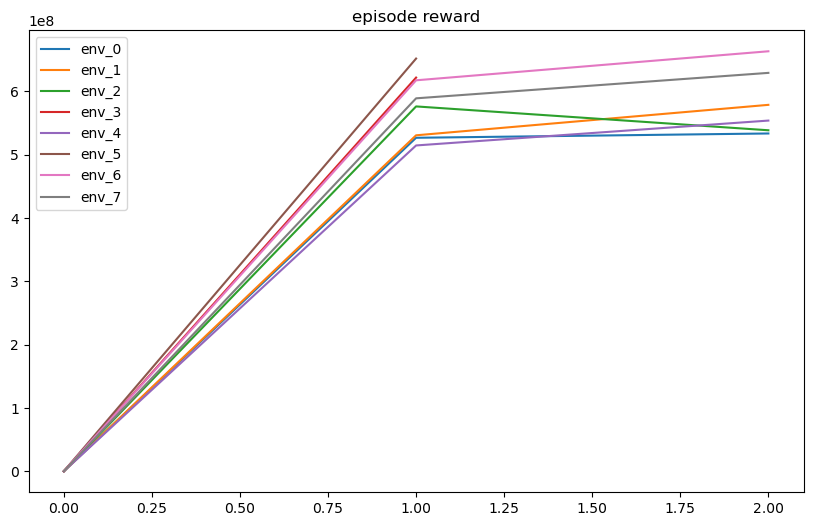

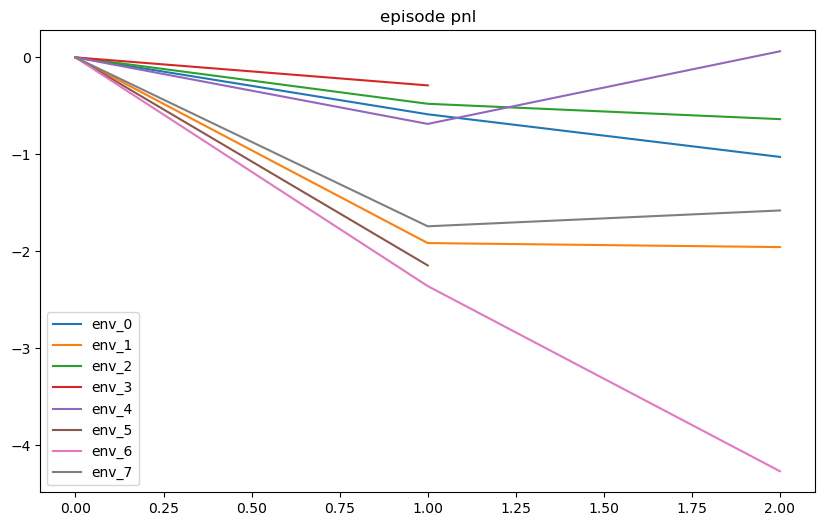

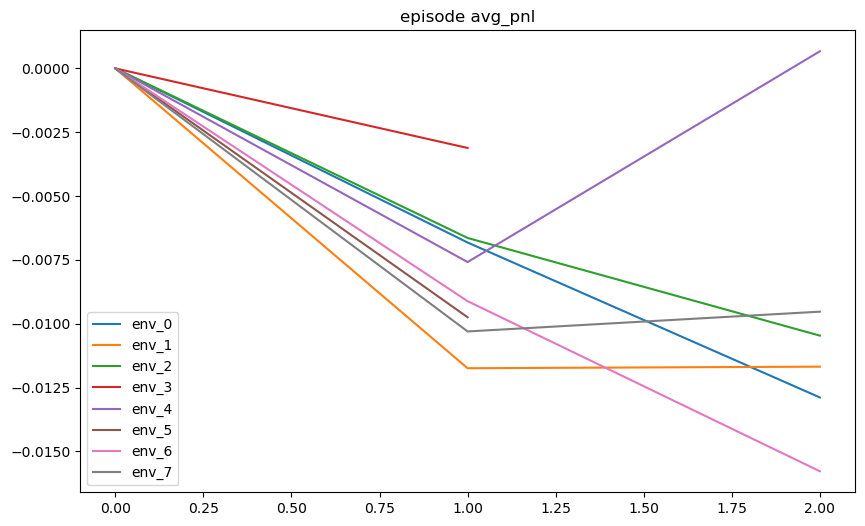

"\nfig = plt.figure(figsize=(10,6))\nplt.title('Episode Rewards')\nfor i in labels:\n    plt.plot(statistics_dict[i]['reward'], label = f'env_{i}')\nplt.legend()\nplt.show()\n\nfig = plt.figure(figsize=(10,6))\nplt.title('Episode PnL')\nfor i in labels:\n    plt.plot(statistics_dict[i]['pnl'], label = f'env_{i}')\nplt.legend()\nplt.show()\n\nfig = plt.figure(figsize=(10,6))\nplt.title('Episode Avg PnL')\nfor i in labels:\n    plt.plot(statistics_dict[i]['avg_pnl'], label = f'env_{i}')\nplt.legend()\nplt.show()\n"

In [20]:
save = False
labels = list(statistics_dict.keys())
plot_types = list(statistics_dict[labels[0]].keys())
num_plots = len(plot_types)
for type in plot_types:
    fig = plt.figure(figsize=(10,6))
    plt.title('episode ' + type)
    for i in labels:
        plt.plot(statistics_dict[i][type], label = f'env_{i}')
    plt.legend()

    if not save:
        plt.show()
    else:
        plt.savefig(f"episode_{type}.png", 
                        facecolor=fig.get_facecolor(), edgecolor='none')
        plt.close(fig)    
'''
fig = plt.figure(figsize=(10,6))
plt.title('Episode Rewards')
for i in labels:
    plt.plot(statistics_dict[i]['reward'], label = f'env_{i}')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title('Episode PnL')
for i in labels:
    plt.plot(statistics_dict[i]['pnl'], label = f'env_{i}')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,6))
plt.title('Episode Avg PnL')
for i in labels:
    plt.plot(statistics_dict[i]['avg_pnl'], label = f'env_{i}')
plt.legend()
plt.show()
'''